# Simulations

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#can use any random seed- lets preset this
np.random.seed(1349) 

#preset the number of simulations we'll have
n_simulations =100_000

<hr style="border:2px solid gray">

### 1. How likely is it that you roll doubles when rolling two dice?

- First, let's look at this without our imports, just with the human eye
- (1,1) (2,2) (3,3) (4,4) (5,5) (6,6) are the double if we have two die

In [3]:
#6 chances for a double out of 36 rolls
6/36 

0.16666666666666666

- Now, lets use our imports to get an answer via simulation

In [4]:
#number of dice
n_dice = 2 

#possible outcomes
outcomes = [1,2,3,4,5,6]

In [5]:
rolls = np.random.choice(outcomes, size=(n_simulations, n_dice))

#call our variable
rolls

array([[3, 2],
       [5, 3],
       [4, 4],
       ...,
       [3, 5],
       [2, 4],
       [4, 5]])

In [6]:
#let's turn this into a dataframe so we can see our outcomes more clearly
rolls =pd.DataFrame(rolls)

#call our new dataframe
rolls.head()

,0,1
0,3,2
1,5,3
2,4,4
3,6,2
4,1,1


In [7]:
#the average likelyhood that roll in index 0 will equal roll in index 1
(rolls[0] == rolls[1]).mean()

0.16445

<hr style="border:1.5px solid black">

### #2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [8]:
#number of coins
n_coins = 8 

#possible outcomes
outcomes = ['H', 'T']

In [9]:
#us random choice to get the simulation
coinflips = np.random.choice(outcomes, size=(n_simulations, n_coins))

#call the variable
coinflips

array([['T', 'H', 'T', ..., 'H', 'T', 'T'],
       ['T', 'H', 'T', ..., 'H', 'H', 'H'],
       ['T', 'T', 'T', ..., 'H', 'T', 'T'],
       ...,
       ['T', 'T', 'H', ..., 'H', 'H', 'T'],
       ['H', 'H', 'H', ..., 'T', 'H', 'T'],
       ['T', 'H', 'H', ..., 'H', 'H', 'T']], dtype='<U1')

In [10]:
#let's look at the possibility of the coinflip being Heads
flips_by_sim = (coinflips == 'H').sum(axis=1)

#call that variable
flips_by_sim

array([3, 4, 1, ..., 3, 4, 5])

##### Landing on Heads exactly 3 times

In [11]:
#what is the possibility of the flips being heads exactly 3 times
(flips_by_sim == 3).mean()

0.21747

##### Landing on Heads more than 3 times

In [12]:
#using data from above
(flips_by_sim > 3).mean()

0.63597

In [13]:
#completely redone
outcomes = ['H','T']
n_coins = 8

coinflips = np.random.choice(outcomes, size=(n_simulations, n_coins))
flips_by_sim = (coinflips == 'H').sum(axis=1)
(flips_by_sim > 3).mean()

0.63702

<hr style="border:1.5px solid black">

### #3 There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

##### First, let's look at this without imports and answer using probability
- 3 webdev per 1 dS == 1/4 classes is DS == 25% of classes are DS
- 2 billboards
- odds of both having a data science student on it
- 25% chance per billboard * 2 billboards = 1/8

In [14]:
(1/4) * (1/4)

0.0625

##### Now, let's answer with simulation

In [15]:
#our possible outcomes with 4 classes
outcomes = ['wd', 'wd', 'wd', 'ds']

#number of billboards
n_billboards = 2

#using random choice, let's see what the outcomes will be
billboards = np.random.choice(outcomes, size=(n_simulations, n_billboards))

#call the variable
billboards

array([['wd', 'wd'],
       ['ds', 'wd'],
       ['wd', 'ds'],
       ...,
       ['wd', 'wd'],
       ['wd', 'wd'],
       ['wd', 'wd']], dtype='<U2')

In [16]:
# our only options are...
outcomes = ['wd','ds']

#using the probability of 1/4 classes being DS, and 3/4 classes being WD
billboards = np.random.choice(outcomes, size=(n_simulations, n_billboards), 
                p=[0.75, 0.25])

#let's see our outcomes
billboards

array([['wd', 'wd'],
       ['wd', 'wd'],
       ['wd', 'wd'],
       ...,
       ['ds', 'wd'],
       ['wd', 'wd'],
       ['ds', 'wd']], dtype='<U2')

In [17]:
#what are the possibilities that the billboard will be exactly data science
(billboards == 'ds').sum(axis=1)

array([0, 0, 0, ..., 1, 0, 1])

In [18]:
#what is the probability that TWO billboards will be exactly data science
prob = ((billboards == 'ds').sum(axis=1) == 2).mean()

#call that variable
prob

0.06122

##### Converting from probability to odds:

In [19]:
# Probability of seeing anything else
1-prob

0.93878

In [20]:
#odds of seeing a builboard that is not WD
odds = prob/(1-prob)
odds

0.06521229681075438

In [21]:
# theoretical prob
0.25 * 0.25

0.0625

<hr style="border:1.5px solid black">

### #4 Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

##### Let's break this down

- 1.5-4.5 puchases a day (average 3)
- 17 packages every monday
- probability to buy one on Friday
- Mon:17 - (1.5-4.5) = 15.5-12.5 =day 1 prob = 100%
- Tues: 15-12.5 - (1.5-4.5)= 13.5-8 = day 2 prob 100% 
- Wed:13.5-8 - (1.5-4.5)= 12-3.5 = day 3 prob 100%
- Thurs: 12-3.5 - (1.5-4.5)= 10.5-(-1) = day 4, could have 10.5 or -1 left / 50% chance
- Friday: 10.5 -(-1) - (1.5-4.5) = 9-(-5.5)= day 4, could have 9 or -5.5/ 50% chance

##### Now, let's use simulation

In [22]:
mean = 3 
sd = 1.5

n_days = 5

In [23]:
#let's use random normal becuase we have the mean and sd already
#see what are chances are that poptarts are bought that day
poptarts_bought_day = np.random.normal(mean, sd, size=(n_simulations, n_days))

#take a look at what we get
poptarts_bought_day

array([[ 1.16283588,  3.38556303,  2.53839614,  6.84525014,  1.69433699],
       [ 0.82889227,  2.7175624 ,  3.03055605,  3.17890752,  4.17497634],
       [ 4.12536744,  2.94665612, -0.6539064 ,  3.75840019,  3.44213048],
       ...,
       [ 4.53147419,  3.64975059,  3.43267494,  1.74026744, -0.9701048 ],
       [ 4.67763903,  3.53659002,  2.02264614,  2.71161261,  4.16466079],
       [ 1.00720269,  3.38204277,  3.27837179,  2.56131665,  1.45123838]])

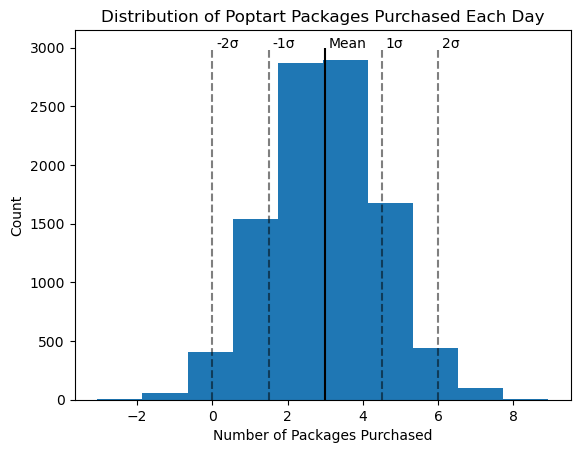

In [24]:
#we can visualize these popart daily purchases if we want to
plt.hist(np.random.normal(3, 1.5, size = (10000)))
plt.title('Distribution of Poptart Packages Purchased Each Day')
plt.vlines(3, 0, 3000, color='black')
plt.text(3.1, 3000, 'Mean')
plt.vlines(4.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(4.6, 3000, '1σ')
plt.vlines(6.0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(6.1, 3000, '2σ')
plt.vlines(1.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(1.6, 3000, '-1σ')
plt.vlines(0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(0.1, 3000, '-2σ')
plt.ylabel('Count')
plt.xlabel('Number of Packages Purchased')
plt.show()

In [25]:
#see what are chances are that poptarts are bought per week
poptarts_bought_per_week = poptarts_bought_day.sum(axis=1)

#call that variable
poptarts_bought_per_week

array([15.62638218, 13.93089458, 13.61864783, ..., 12.38406235,
       17.11314859, 11.68017227])

In [26]:
#probability that less than 17 poptarts are bought that week
(poptarts_bought_per_week <= 16).mean()

0.61567

<hr style="border:1.5px solid black">

### #5 Compare Heights
- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- If a man and woman are chosen at random, P(woman taller than man)?

In [27]:
#men's average height in cm
men_avg= 178
#men's standard deviation in cm
men_std=8

#women's average height in cm
women_avg=170
#women's standard deviation in cm
women_std=6

In [28]:
#using random normal, lets find the average heights of men (in cm) for 100K simulations
height_men = np.random.normal(men_avg, men_std, n_simulations)

#call that variable
height_men

array([177.93448324, 167.71305595, 182.20659687, ..., 181.29220212,
       178.45696107, 181.3655779 ])

In [29]:
#using random normal, lets find the average heights of women (in cm) for 100K simulations
height_women = np.random.normal(women_avg, women_std, n_simulations)

#call that variable
height_men

array([177.93448324, 167.71305595, 182.20659687, ..., 181.29220212,
       178.45696107, 181.3655779 ])

In [30]:
#what is the average probability that men are taller then women
(height_women > height_men).mean()

0.21168

<hr style="border:0.5px solid black">

##### another way to code this same question

In [31]:
men = np.random.normal(178, 8, size = n_simulations)
men

array([168.73770932, 186.61863228, 194.9926388 , ..., 174.49507145,
       169.39863027, 181.30983517])

In [32]:
women = np.random.normal(170, 6, size = n_simulations)
women

array([167.25096473, 163.86519891, 164.1978826 , ..., 166.01447828,
       176.31530901, 170.24577267])

In [33]:
#probability that women are taller then men on average
(women > men).mean()

0.21166

<hr style="border:1.5px solid black">

### #6 When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails.
- What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?

##### Let's break it down
- prob_fail = 1/250
- 50 students == 0 fails
- 100 students == 0 fails
- 150 students >= 1 fail
- 450 students == 0 fails

##### 50 installs with no issues

In [36]:
#possible outcomes, success or failure
outcomes = ['S', 'F']

n_students = 50

In [37]:
downloads = np.random.choice(outcomes, size=(n_simulations, n_students), 
                p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'F', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

In [38]:
(downloads == 'S').sum(axis=1)

array([50, 50, 50, ..., 50, 50, 48])

In [39]:
((downloads == 'S').sum(axis=1) == 50).mean()

0.81707

<hr style="border:0.5px solid black">

##### 100 installs

In [40]:
outcomes = ['S', 'F']
n_students = 100

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), 
                p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) < n_students).mean()

0.33166

<hr style="border:0.5px solid black">

##### 150 installs at least 1 fail

In [41]:
outcomes = ['S', 'F']
n_students = 150

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), 
                p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) < n_students).mean()

0.44883

<hr style="border:0.5px solid black">

##### 450 installs

In [42]:
outcomes = ['S', 'F']
n_students = 450

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), 
                p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) == n_students).mean()

0.16737

<hr style="border:1px solid black">

### #7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [44]:
n_days = 3

In [45]:
# 0 = no truck, 1 = truck shows up
trucks = np.random.choice([0, 1], size = (n_simulations, n_days), p = [0.3, 0.7])

#call the variable
trucks

array([[0, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 0],
       [1, 0, 0]])

##### probability that no truck shows up in 3 days

In [46]:
#axis 1 is 0 (or no truck shows up)
(trucks.sum(axis = 1) == 0).mean()

0.02723

##### How likely is it that a food truck will show up sometime this week

In [47]:
#likelyhood that in axis 1 there is a 1 (or a truck DOES show up) one or more days
(trucks.sum(axis = 1) >= 1).mean()

0.97277

<hr style="border:1px solid black">

### #8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?


Let's break it down:
- 365 days in a year
- what's the probability of same birthday

#### 23 students in the class

In [48]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students= 23 

In [49]:
#using random choice to get the possible birthdays
birthdays= np.random.choice(outcomes, size=(n_simulations, n_students))

#call that variable
birthdays

array([[312, 199,   6, ..., 222,  64, 252],
       [259, 334, 259, ..., 346, 188,  75],
       [114, 209, 243, ..., 241, 356, 359],
       ...,
       [ 26,  38, 172, ..., 167,  59, 333],
       [292, 319,  51, ..., 343, 197, 292],
       [ 50, 227, 132, ..., 111,  72,   7]])

In [50]:
#turn it into a DF so it's easier to read
birthdays = pd.DataFrame(birthdays)

#call our new DF
birthdays.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,312,199,6,133,225,126,296,94,108,131,...,114,238,322,364,340,20,228,222,64,252
1,259,334,259,188,185,45,104,300,159,77,...,261,265,98,19,251,62,87,346,188,75
2,114,209,243,80,334,334,207,148,256,285,...,244,349,130,166,356,75,232,241,356,359
3,256,5,229,176,50,203,216,282,30,163,...,167,65,5,163,82,272,119,55,111,91
4,72,219,116,2,345,206,10,116,184,95,...,13,241,296,245,118,140,158,55,287,115


In [51]:
#what are the chances that on average we will have a unique birthday
(birthdays.nunique(axis=1) < 23).mean()

0.50825

<hr style="border:0.5px solid black">

#### 20 students per class

In [52]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students= 20 

In [53]:
#let's see what the possibility of birhtdays is with 20 students
birthdays= np.random.choice(outcomes, size=(n_simulations, n_students))

#turn that into a DF
birthdays = pd.DataFrame(birthdays)

#call the DF
birthdays

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,42,315,51,235,328,138,319,292,212,196,90,274,310,338,187,197,253,279,129,218
1,222,24,246,9,157,241,237,100,10,176,50,171,282,146,165,185,10,252,177,0
2,254,334,323,361,141,40,238,304,108,321,117,321,79,352,131,112,112,162,211,168
3,113,302,357,80,314,68,221,306,139,348,206,58,217,19,191,196,15,254,336,93
4,184,342,94,362,2,63,161,263,189,10,156,309,96,148,46,317,345,158,359,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,159,307,248,33,343,322,200,165,332,191,15,179,307,334,65,10,184,134,57,163
99996,106,52,252,67,198,193,182,112,70,266,272,190,324,158,112,193,292,290,231,289
99997,333,63,10,247,103,87,1,48,99,178,239,211,35,164,186,138,48,335,251,109
99998,212,265,314,349,265,225,248,236,209,87,267,242,245,84,197,85,298,90,313,160


In [54]:
#get the probability
(birthdays.nunique(axis=1) = n_students).mean()

0.4099

<hr style="border:0.5px solid black">

##### 40 students per class

In [55]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students = 40

#let's see what the possibility of birhtdays is with 40 students
birthdays = np.random.choice(outcomes, size=(n_simulations, n_students))

#call the DF
birthdays = pd.DataFrame(birthdays)

In [56]:
#get the probability
(birthdays.nunique(axis=1) < n_students).mean()

0.89029